# Midterm Deliverable: EPA - GHG Emissions


**Due Date:** 2-9-2025

**Group Members**
* Migus Wong
* Michael Yoo
* David Van Dyke
* Ethan Norton

**Chosen Dataset :** [EPA - GHG Emissions](https://www.epa.gov/ghgreporting/data-sets)

## Table of Contents

>[Midterm Deliverable: EPA - GHG Emissions](#scrollTo=vzqz8R_wWtRL)

>>[Table of Contents](#scrollTo=KVOpEm8dYT9o)

>[Importing drive](#scrollTo=8fTjeyIMZg9n)

>[Data Loading and Imports](#scrollTo=IavVxfAuYqLz)

>[Null Analysis](#scrollTo=o1_jI-GZZdqS)

>[EDA](#scrollTo=veOK4LeAbBWm)

>[State Analysis](#scrollTo=eXXTkqVKLRfx)

>[Outlier Detection](#scrollTo=jFcq7-JbLv2J)

>[Top 20 Plants by State](#scrollTo=s_yZw9THSl3_)

>[Looking into Monitoring Status](#scrollTo=pSfoUcneUt4h)

>>[First top 20, then overall](#scrollTo=pSfoUcneUt4h)



# Importing drive

In [1]:
#Code to link colab notebook to google drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

import os
!mkdir -p "/content/drive/MyDrive/ColabFiles"
!pip install nbconvert

Mounted at /content/drive


In [2]:
import pandas as pd
!pip install openpyxl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading and Imports

Reading files: 100%|██████████| 13/13 [01:30<00:00,  6.95s/it]



Merged Dataset Info:
Total rows: 87908
Total unique facilities: 8711

Rows per year:
Year
2010    6297
2011    6907
2012    7102
2013    7191
2014    7349
2015    7242
2016    6572
2017    6488
2018    6581
2019    6580
2020    6556
2021    6529
2022    6514
Name: count, dtype: int64

Missing Facility IDs: 0

Yearly Statistics:
     Facility Id Total reported direct emissions              
           count                            mean           sum
Year                                                          
2010        6297                       507634.06  3.196572e+09
2011        6907                       464395.97  3.207583e+09
2012        7102                       430593.61  3.058076e+09
2013        7191                       427369.48  3.073214e+09
2014        7349                       419658.29  3.084069e+09
2015        7242                       405888.37  2.939444e+09
2016        6572                       426680.55  2.804145e+09
2017        6488                       

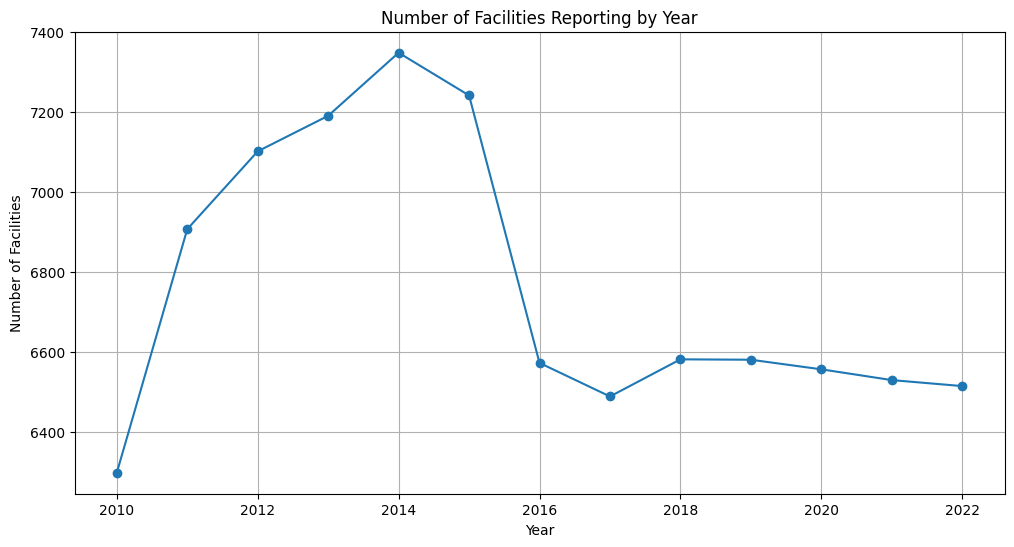

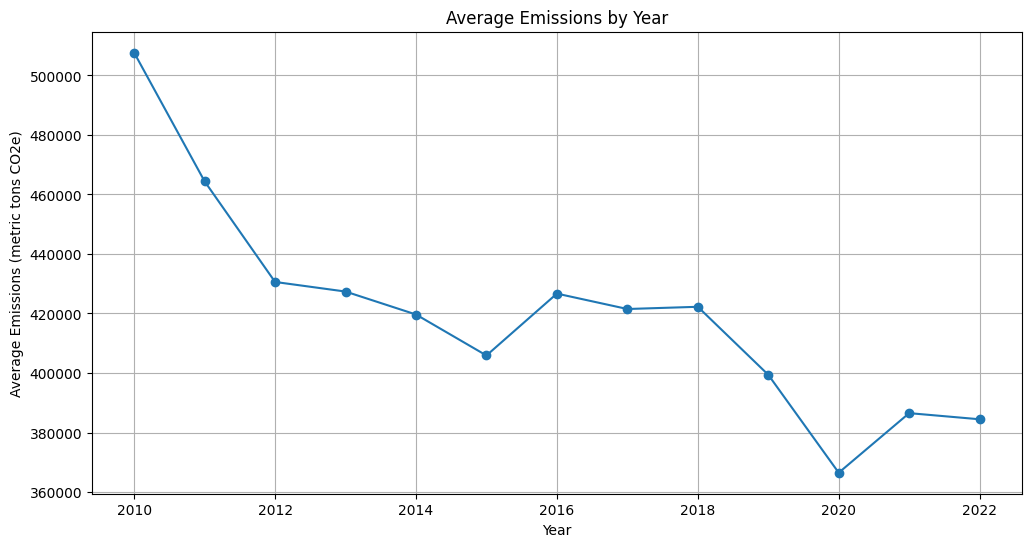

In [3]:
import pandas as pd
import glob
from tqdm import tqdm  # For progress bar

# Create an empty list to store dataframes
dfs = []

# Years we're working with
years = range(2010, 2023)

# Read each file
for year in tqdm(years, desc="Reading files"):
    file_path = f'/content/drive/MyDrive/MSDS422 - Group 1/Final Project/Data/ghgp_data_{year}.xlsx'

    # Read the file
    temp_df = pd.read_excel(file_path, skiprows=3)

    # Add year column
    temp_df['Year'] = year

    # Append to list
    dfs.append(temp_df)

# Merge all dataframes
merged_df = pd.concat(dfs, ignore_index=True)

# Print info about the merged dataset
print("\nMerged Dataset Info:")
print(f"Total rows: {len(merged_df)}")
print(f"Total unique facilities: {merged_df['Facility Id'].nunique()}")
print("\nRows per year:")
print(merged_df['Year'].value_counts().sort_index())

# Check for any missing Facility IDs
print(f"\nMissing Facility IDs: {merged_df['Facility Id'].isnull().sum()}")

# Basic statistics over time
yearly_stats = merged_df.groupby('Year').agg({
    'Facility Id': 'count',
    'Total reported direct emissions': ['mean', 'sum']
}).round(2)

print("\nYearly Statistics:")
print(yearly_stats)

# Optional: Save merged dataset
# merged_df.to_csv('merged_emissions_2010_2023.csv', index=False)

# Create a plot showing number of facilities over time
plt.figure(figsize=(12, 6))
merged_df['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Facilities Reporting by Year')
plt.xlabel('Year')
plt.ylabel('Number of Facilities')
plt.grid(True)
plt.show()

# Create a plot showing average emissions over time
plt.figure(figsize=(12, 6))
yearly_avg = merged_df.groupby('Year')['Total reported direct emissions'].mean()
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Average Emissions (metric tons CO2e)')
plt.grid(True)
plt.show()

In [4]:
pd.set_option('display.max_columns', None)
merged_df.head()

Facility Id        FRS Id                                   Facility Name  \
0      1004377  1.100438e+11                  121 REGIONAL DISPOSAL FACILITY   
1      1000112  1.100198e+11                                    23rd and 3rd   
2      1006394           NaN                  29-6 #2 Central Delivery Point   
3      1002885           NaN  30-5 Central Delivery Point Compressor Station   
4      1002707           NaN                     31-6 Central Delivery Point   

         City State  Zip Code                   Address         County  \
0     MELISSA    TX     75454  3820 SAM RAYBURN HIGHWAY  COLLIN COUNTY   
1    BROOKLYN    NY     11232            730 3rd Avenue          Kings   
2      Blanco    NM     87412                       NaN     Rio Arriba   
3       Aztec    NM     87410                       NaN     Rio Arriba   
4  BLOOMFIELD    NM     87413                       NaN     Rio Arriba   

   Latitude  Longitude  Primary NAICS Code Industry Type (subparts)  \
0  33.29857  -96.53586            562212.0                       HH   
1  40.66300  -74.00000            221112.0                      C,D   
2  36.74520 -107.44550            213112.0                 C (Abbr)   
3  36.81180 -107.40360            213112.0                 C (Abbr)   
4  36.83630 -107.41990            213112.0                 C (Abbr)   

             Industry Type (sectors)  Total reported direct emissions  \
0                              Waste                            0.000   
1                       Power Plants                        82959.744   
2  Petroleum and Natural Gas Systems                        25176.656   
3  Petroleum and Natural Gas Systems                        38883.204   
4  Petroleum and Natural Gas Systems                        63884.360   

   CO2 emissions (non-biogenic)   Methane (CH4) emissions   \
0                            0.0                       NaN   
1                        82875.9                     38.25   
2                        25150.9                     11.75   
3                        38843.2                     18.25   
4                        63818.6                     30.00   

   Nitrous Oxide (N2O) emissions   HFC emissions  PFC emissions  \
0                             NaN            NaN            NaN   
1                          45.594            NaN            NaN   
2                          14.006            NaN            NaN   
3                          21.754            NaN            NaN   
4                          35.760            NaN            NaN   

   SF6 emissions   NF3 emissions  Other Fully Fluorinated GHG emissions  \
0             NaN            NaN                                    NaN   
1             NaN            NaN                                    NaN   
2             NaN            NaN                                    NaN   
3             NaN            NaN                                    NaN   
4             NaN            NaN                                    NaN   

   HFE emissions  Very Short-lived Compounds emissions  \
0            NaN                                   NaN   
1            NaN                                   NaN   
2            NaN                                   NaN   
3            NaN                                   NaN   
4            NaN                                   NaN   

   Other GHGs (metric tons CO2e)  Biogenic CO2 emissions (metric tons)  \
0                            NaN                                   NaN   
1                            NaN                                   NaN   
2                            NaN                                   NaN   
3                            NaN                                   NaN   
4                            NaN                                   NaN   

   Stationary Combustion  Electricity Generation  Adipic Acid Production  \
0                    NaN                     NaN                     NaN   
1                362.800              

In [5]:
columns_to_keep = merged_df.columns[:14].tolist() + ['Year']
new_df = merged_df[columns_to_keep]
new_df

Facility Id        FRS Id  \
0          1004377  1.100438e+11   
1          1000112  1.100198e+11   
2          1006394           NaN   
3          1002885           NaN   
4          1002707           NaN   
...            ...           ...   
87903      1004144  1.100712e+11   
87904      1009093  1.100712e+11   
87905      1011356           NaN   
87906      1003318  1.100230e+11   
87907      1010592  1.100712e+11   

                                        Facility Name        City State  \
0                      121 REGIONAL DISPOSAL FACILITY     MELISSA    TX   
1                                        23rd and 3rd    BROOKLYN    NY   
2                      29-6 #2 Central Delivery Point      Blanco    NM   
3      30-5 Central Delivery Point Compressor Station       Aztec    NM   
4                         31-6 Central Delivery Point  BLOOMFIELD    NM   
...                                               ...         ...   ...   
87903                          XTO - New Teague Plant      Teague    TX   
87904                          Yoakum Cryogenic Plant      Yoakum    TX   
87905                                ZIA II GAS PLANT  Lea County    NM   
87906                          ZYBACH CRYOGENIC PLANT     Briscoe    TX   
87907                                           Zider       Aiken    TX   

       Zip Code                   Address            County   Latitude  \
0         75454  3820 SAM RAYBURN HIGHWAY     COLLIN COUNTY  33.298570   
1         11232            730 3rd Avenue             Kings  40.663000   
2         87412                       NaN        Rio Arriba  36.745200   
3         87410                       NaN        Rio Arriba  36.811800   
4         87413                       NaN        Rio Arriba  36.836300   
...         ...                       ...               ...        ...   
87903     75860               230 FCR 640  FREESTONE COUNTY  31.591369   
87904     77995                       NaN     LAVACA COUNTY  29.342100   
87905     88240                       NaN               Lea  32.643022   
87906     79011             16475 FM 1046    WHEELER COUNTY  35.605000   
87907     75935             N 31 42'14.83     SHELBY COUNTY  31.795396   

        Longitude  Primary NAICS Code Industry Type (subparts)  \
0      -96.535860            562212.0                       HH   
1      -74.000000            221112.0                      C,D   
2     -107.445500            213112.0                 C (Abbr)   
3     -107.403600            213112.0                 C (Abbr)   
4     -107.419900            213112.0                 C (Abbr)   
...           ...                 ...                      ...   
87903  -96.216360            211130.0                 C,W-PROC   
87904  -97.110000            211130.0                 C,W-PROC   
87905 -103.808867            211130.0           C,PP,UU,W-PROC   
87906 -100.148333            211130.0                 C,W-PROC   
87907  -94.179048            486210.0                 C,W-PROC   

                                 Industry Type (sectors)  \
0                                                  Waste   
1                                           Power Plants   
2                      Petroleum and Natural Gas Systems   
3                      Petroleum and Natural Gas Systems   
4                      Petroleum and Natural Gas Systems   
...                                                  ...   
87903                  Petroleum and Natural Gas Systems   
87904                  Petroleum and Natural Gas Systems   
87905  Injection of CO2,Petroleum and Natural Gas Sys...   
87906                  Petroleum and Natural Gas Systems   
87907                  Petroleum and Natural Gas Systems   

       Total reported direct emissions  Year  
0                                0.000  2010  
1                            82959.744  2010  
2                            25176.656  2010  
3                            38883.204  2010  
4                            63884.

In [6]:
# Display the data types of each column
print("Data Types:")
print(new_df.dtypes)

# Display the number of missing values in each column
print("\nMissing Values:")
print(new_df.isnull().sum())

# Display basic statistics for numerical columns
print("\nBasic Statistics:")
print(new_df.describe())

# Display basic statistics for categorical columns
print("\nCategorical Columns Statistics:")
print(new_df.describe(include=['object', 'category']))

Data Types:
Facility Id                          int64
FRS Id                             float64
Facility Name                       object
City                                object
State                               object
Zip Code                             int64
Address                             object
County                              object
Latitude                           float64
Longitude                          float64
Primary NAICS Code                 float64
Industry Type (subparts)            object
Industry Type (sectors)             object
Total reported direct emissions    float64
Year                                 int64
dtype: object

Missing Values:
Facility Id                           0
FRS Id                             1743
Facility Name                         0
City                                  0
State                                 0
Zip Code                              0
Address                            6988
County                          

In [7]:
new_df = new_df.drop(columns=['FRS Id', 'Address', 'County'])

In [8]:
# Display the data types of each column
print("Data Types:")
print(new_df.dtypes)

# Display the number of missing values in each column
print("\nMissing Values:")
print(new_df.isnull().sum())

# Display basic statistics for numerical columns
print("\nBasic Statistics:")
print(new_df.describe())

# Display basic statistics for categorical columns
print("\nCategorical Columns Statistics:")
print(new_df.describe(include=['object', 'category']))

Data Types:
Facility Id                          int64
Facility Name                       object
City                                object
State                               object
Zip Code                             int64
Latitude                           float64
Longitude                          float64
Primary NAICS Code                 float64
Industry Type (subparts)            object
Industry Type (sectors)             object
Total reported direct emissions    float64
Year                                 int64
dtype: object

Missing Values:
Facility Id                        0
Facility Name                      0
City                               0
State                              0
Zip Code                           0
Latitude                           0
Longitude                          0
Primary NAICS Code                 8
Industry Type (subparts)           0
Industry Type (sectors)            0
Total reported direct emissions    0
Year                              

   Facility Id  Zip Code  Latitude  Longitude  Primary NAICS Code  \
0      1004377     75454  33.29857  -96.53586            562212.0   
1      1000112     11232  40.66300  -74.00000            221112.0   
2      1006394     87412  36.74520 -107.44550            213112.0   
3      1002885     87410  36.81180 -107.40360            213112.0   
4      1002707     87413  36.83630 -107.41990            213112.0   

   Total reported direct emissions  Year  
0                            0.000  2010  
1                        82959.744  2010  
2                        25176.656  2010  
3                        38883.204  2010  
4                        63884.360  2010  
        Facility Id      Zip Code      Latitude     Longitude  \
count  8.790800e+04  87908.000000  87908.000000  87908.000000   
mean   1.005031e+06  54143.919086     37.419818    -92.683318   
std    3.400677e+03  27233.457327      5.926050     16.279557   
min    1.000001e+06      0.000000     13.297100   -174.113611   
25

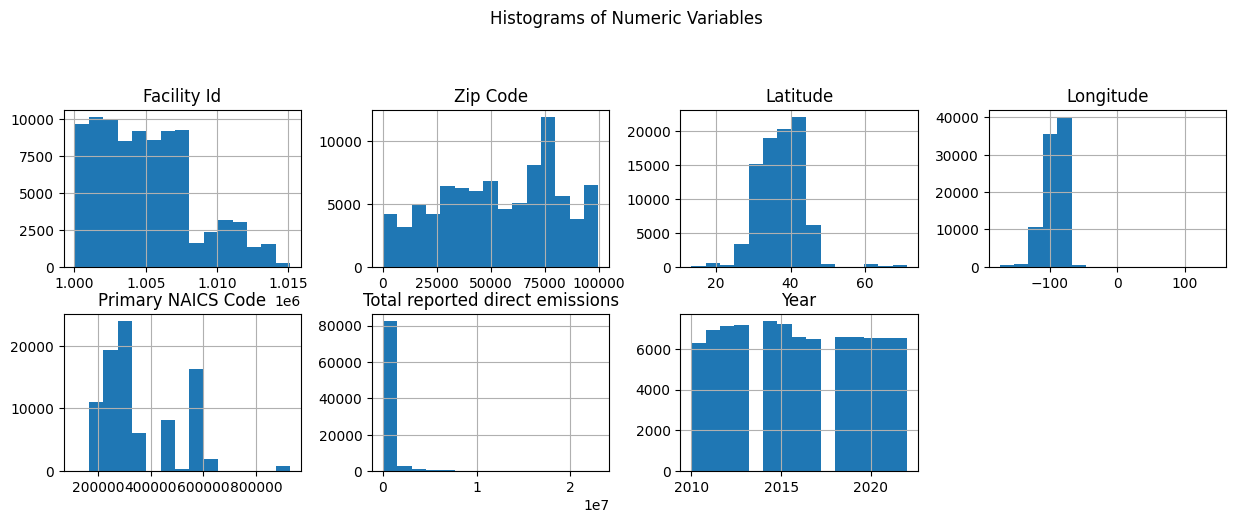

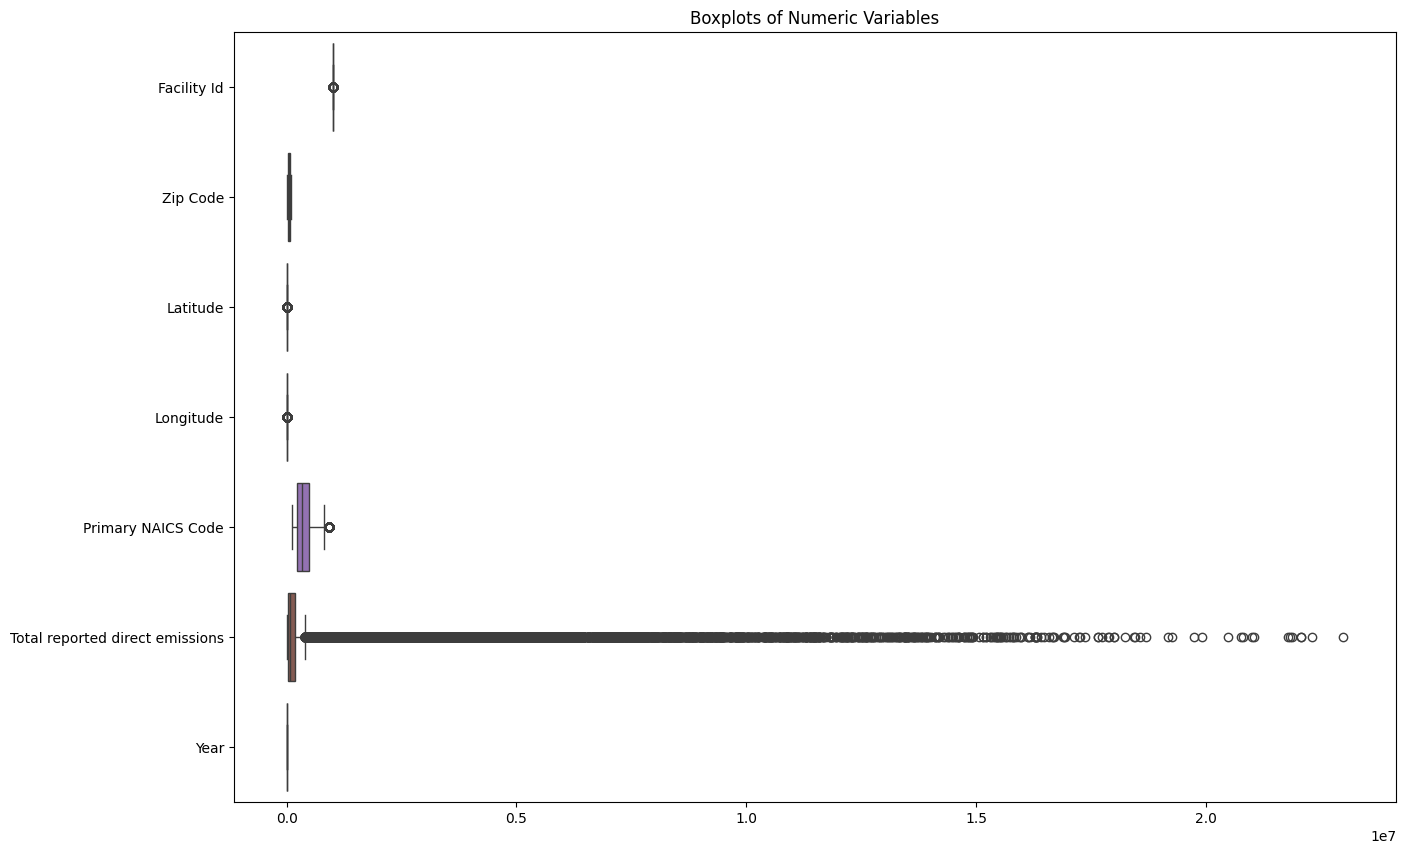

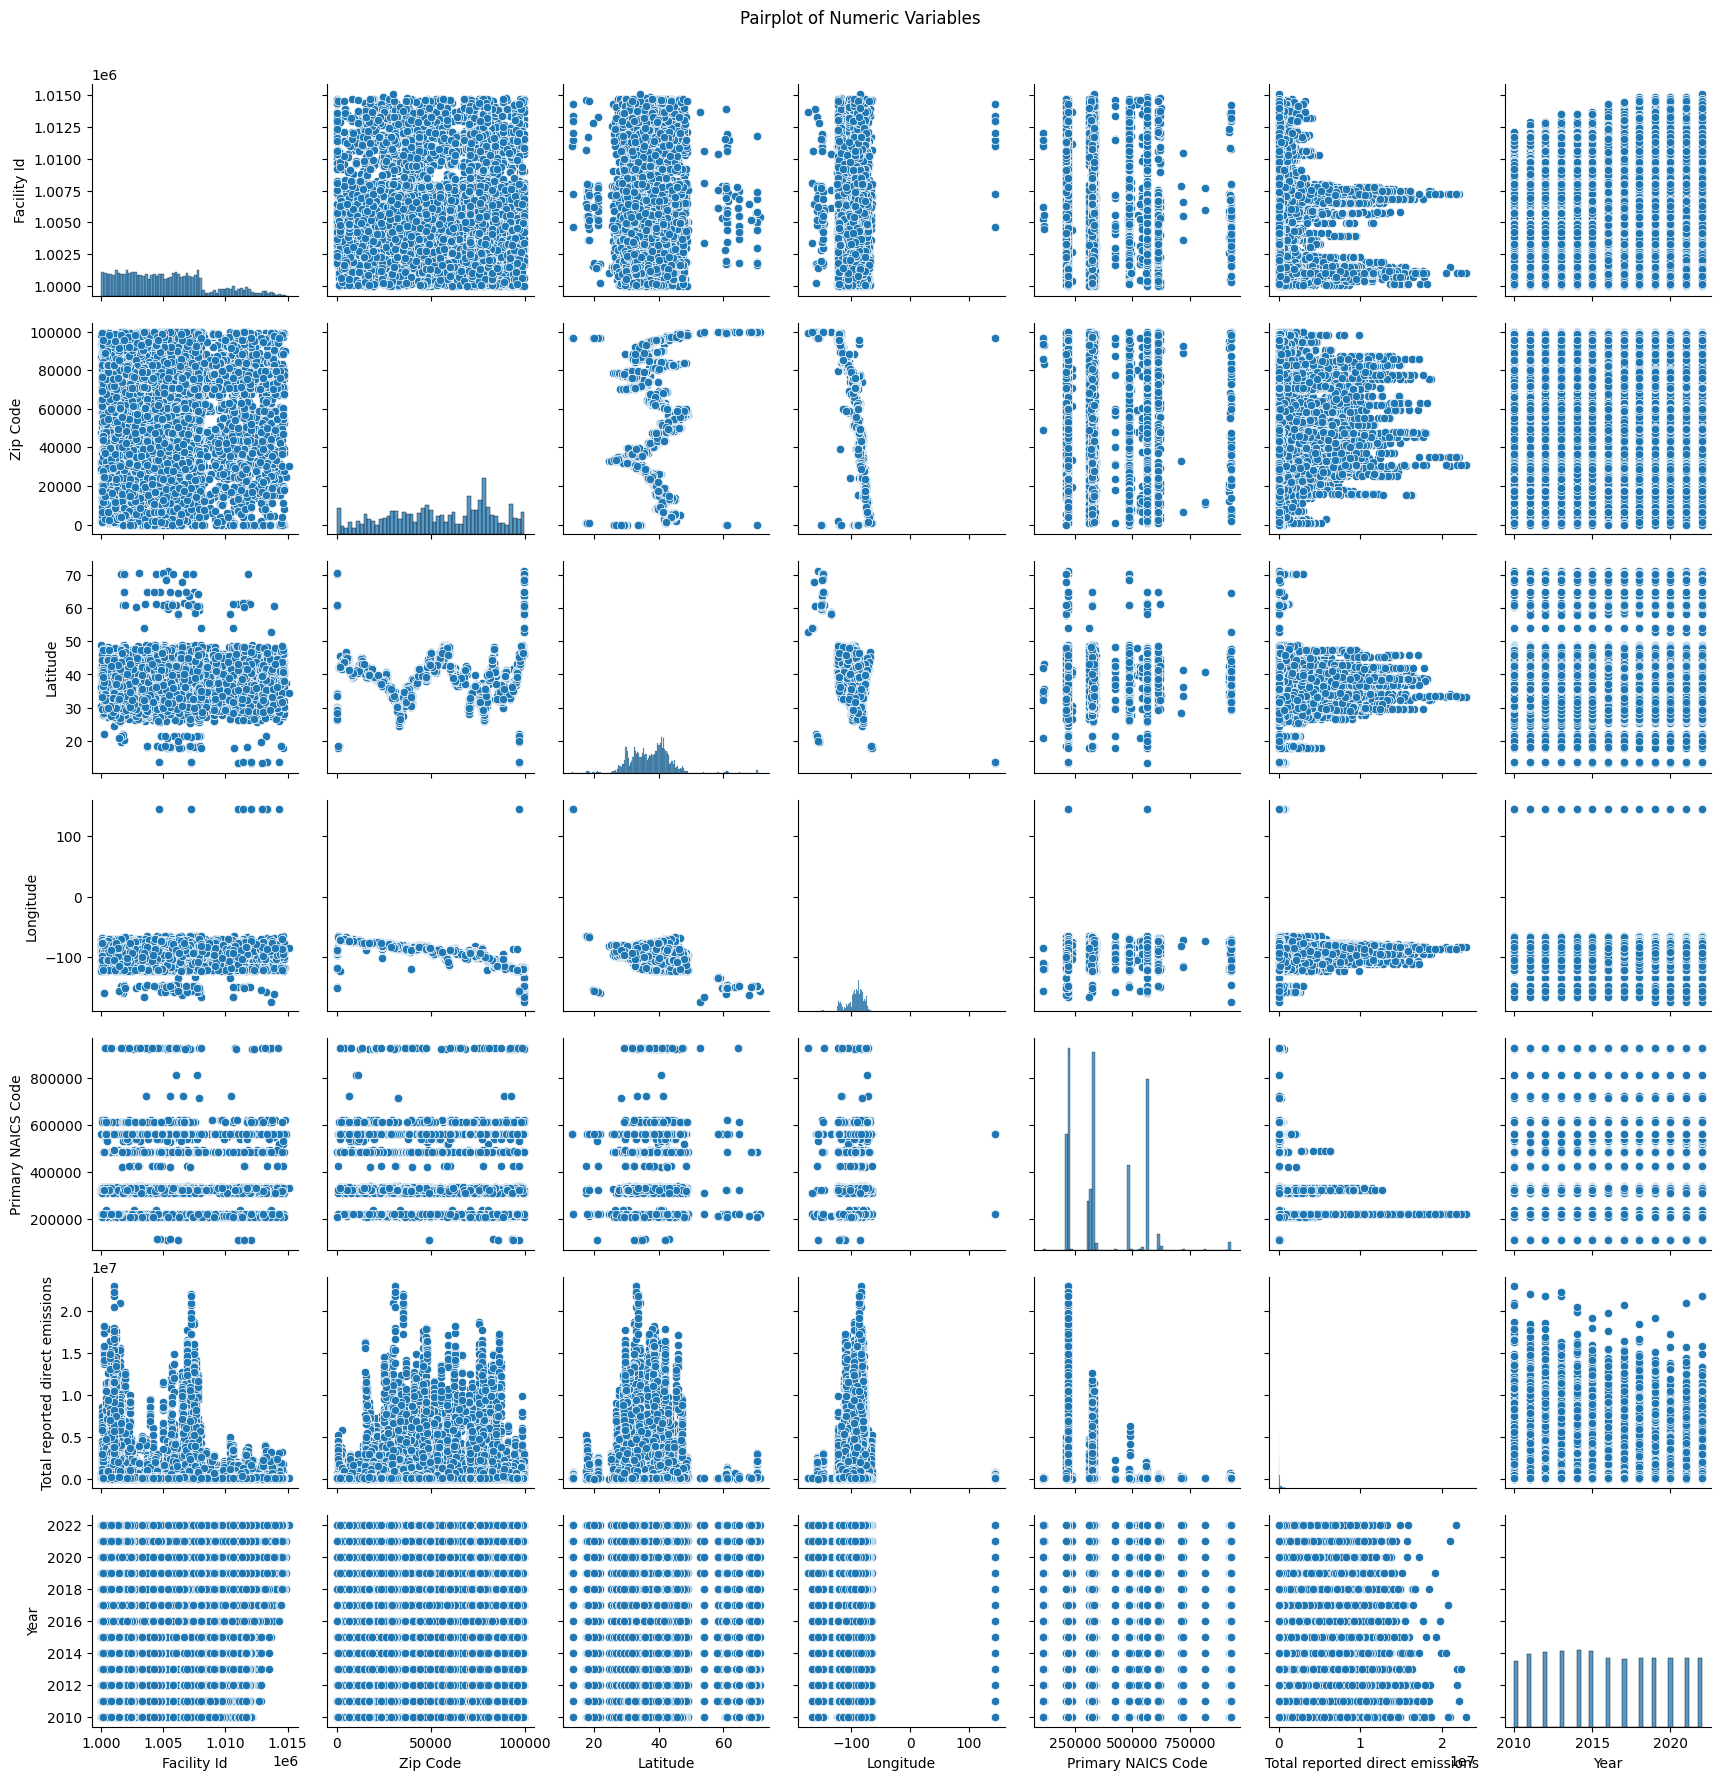

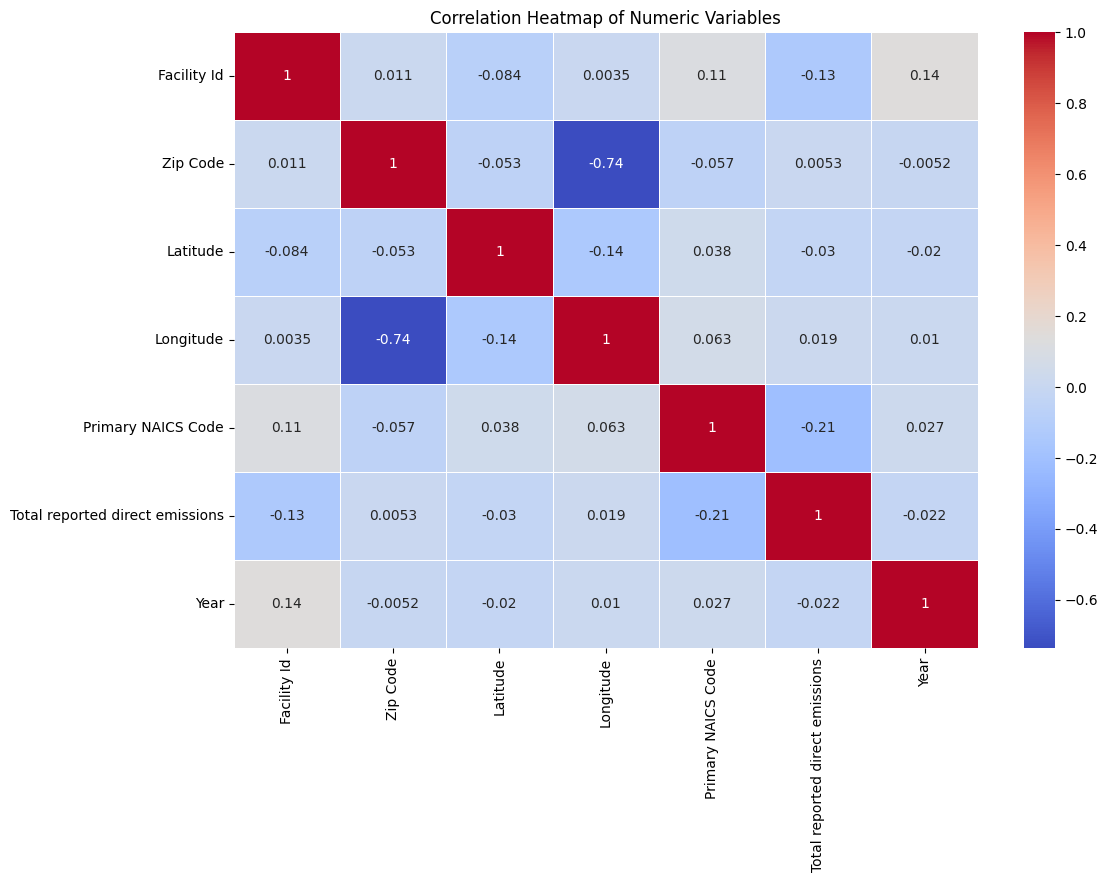

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming new_df is already defined and is a pandas DataFrame

# Select only integer and float columns
numeric_df = new_df.select_dtypes(include=['int64', 'float64'])

# Display the first few rows of the numeric dataframe
print(numeric_df.head())

# Display the summary statistics of the numeric dataframe
print(numeric_df.describe())

# Plot histograms for each numeric column
numeric_df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Histograms of Numeric Variables')
plt.show()

# Plot boxplots for each numeric column
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_df, orient='h')
plt.title('Boxplots of Numeric Variables')
plt.show()

# Plot pairplot to see relationships between numeric variables
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [10]:
# Get the unique values for the 'year' column
unique_years = new_df['Year'].unique()

# Display the unique values
print(unique_years)

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [11]:
# Select only object columns
object_df = new_df.select_dtypes(include=['object'])

# Display the first few rows of the object dataframe
print(object_df.head())

# Display the summary statistics of the object dataframe
print(object_df.describe())

# Display the unique values and their counts for each object column
for column in object_df.columns:
    print(f"\nUnique values in '{column}':")
    print(object_df[column].value_counts())

                                    Facility Name        City State  \
0                  121 REGIONAL DISPOSAL FACILITY     MELISSA    TX   
1                                    23rd and 3rd    BROOKLYN    NY   
2                  29-6 #2 Central Delivery Point      Blanco    NM   
3  30-5 Central Delivery Point Compressor Station       Aztec    NM   
4                     31-6 Central Delivery Point  BLOOMFIELD    NM   

  Industry Type (subparts)            Industry Type (sectors)  
0                       HH                              Waste  
1                      C,D                       Power Plants  
2                 C (Abbr)  Petroleum and Natural Gas Systems  
3                 C (Abbr)  Petroleum and Natural Gas Systems  
4                 C (Abbr)  Petroleum and Natural Gas Systems  
             Facility Name      City  State Industry Type (subparts)  \
count                87908     87908  87908                    87908   
unique                9427      4829     54  

In [12]:
!pip install geodatasets

In [13]:
!pip install folium

In [14]:
from IPython.display import clear_output
import folium
from folium.plugins import HeatMapWithTime
import branca.colormap as cm

import ipywidgets as widgets
from IPython.display import display


# Function to update the heatmap based on the selected industry
def update_heatmap(change):
    selected_industry = change['new'] # Access using key

    # Filter the data based on the selected industry
    if selected_industry == 'All':
        filtered_df = merged_df
    else:
        filtered_df = merged_df[merged_df['Industry Type (sectors)'].str.contains(selected_industry, na=False)]

    # Recreate the heatmap data
    heat_data_filtered = []
    for year in filtered_df['Year'].unique():
        year_data = filtered_df[filtered_df['Year'] == year][['Latitude', 'Longitude', 'Total reported direct emissions']].values.tolist()
        heat_data_filtered.append(year_data)

    # Remove existing heatmap layer if it exists
    m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
    clear_output()

    # Create the colormap
    colormap = cm.LinearColormap(colors=['blue', 'green', 'yellow', 'orange', 'red'], vmin=0, vmax=max(filtered_df['Total reported direct emissions']))
    colormap.caption = 'Total Reported Direct Emissions'

    # Add the new heatmap
    HeatMapWithTime(heat_data_filtered, index=filtered_df['Year'].unique().tolist(), auto_play=True, radius=15).add_to(m)

    # # Add markers with labels for each facility
    # for _, row in filtered_df.iterrows():
    #     folium.Marker(
    #         location=[row['Latitude'], row['Longitude']],
    #         popup=folium.Popup(row['Facility Name'], parse_html=True)
    #     ).add_to(m)

    # Add the colormap to the map
    colormap.add_to(m)

    # Redisplay the map
    display(m)
    display(industry_slider)


In [15]:
# Split each value by comma and flatten the list
industry_types = [item.strip() for sublist in new_df['Industry Type (sectors)'].str.split(',') for item in sublist]
industry_types = list(set(industry_types))  # Remove duplicates
industry_types.insert(0, 'All')

# Recreate the dropdown widget with 'All' option
industry_slider = widgets.Dropdown(
    options=industry_types,
    description='Industry Sector:',
    disabled=False,
)

# Observe the slider for changes
industry_slider.observe(update_heatmap, names='value')

# Initial map display (All industries)
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)
update_heatmap({'new': 'All'}) # initial display with all industries



Dropdown(description='Industry Sector:', options=('All', 'Import and Export of Equipment Containing Fluorintae…

In [17]:
# Examine the merged dataset
print("Column names in the merged DataFrame:")
for col in merged_df.columns:
    print(f"- {col}")

# Display the first few rows of data with selected important columns
important_cols = ['Facility Id', 'Facility Name', 'State', 'Year',
                 'Total reported direct emissions', 'Industry Type (sectors)']
print("\nFirst few rows of data (selected columns):")
print(merged_df[important_cols].head())

# Display basic information about the dataset
print("\nDataset Info:")
print(merged_df.info())

# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(merged_df.describe())

# Show number of facilities per year
print("\nNumber of facilities per year:")
year_counts = merged_df.groupby('Year')['Facility Id'].count()
print(year_counts)

# Show number of unique facilities
print(f"\nTotal unique facilities across all years: {merged_df['Facility Id'].nunique()}")

# Check for missing values
print("\nMissing values in each column:")
missing_values = merged_df.isnull().sum()
missing_percentages = (missing_values / len(merged_df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentages
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

Column names in the merged DataFrame:
- Facility Id
- FRS Id
- Facility Name
- City
- State
- Zip Code
- Address
- County
- Latitude
- Longitude
- Primary NAICS Code
- Industry Type (subparts)
- Industry Type (sectors)
- Total reported direct emissions
- CO2 emissions (non-biogenic) 
- Methane (CH4) emissions 
- Nitrous Oxide (N2O) emissions 
- HFC emissions
- PFC emissions
- SF6 emissions 
- NF3 emissions
- Other Fully Fluorinated GHG emissions
- HFE emissions
- Very Short-lived Compounds emissions
- Other GHGs (metric tons CO2e)
- Biogenic CO2 emissions (metric tons)
- Stationary Combustion
- Electricity Generation
- Adipic Acid Production
- Aluminum Production
- Ammonia Manufacturing
- Cement Production
- Ferroalloy Production
- Glass Production
- HCFC–22 Production from HFC–23 Destruction
- Hydrogen Production
- Iron and Steel Production
- Lead Production
- Lime Production
- Miscellaneous Use of Carbonates
- Nitric Acid Production
- Petrochemical Production
- Petroleum Refining
- P

# Null Analysis


Null Analysis (sorted by most nulls to least):
                                                    Null Count Null Percentage
Silicon Carbide Production                               87895          99.99%
Adipic Acid Production                                   87874          99.96%
Soda Ash Manufacturing                                   87857          99.94%
HCFC–22 Production from HFC–23 Destruction               87849          99.93%
Petroleum and Natural Gas Systems – LNG Storage          87846          99.93%
...                                                        ...             ...
Is some CO2 reported as emissions from the affe...           0            0.0%
Is some CO2 collected on-site and used to manuf...           0            0.0%
Industry Type (sectors)                                      0            0.0%
Total reported direct emissions                              0            0.0%
Facility Id                                                  0            0.0%

[67

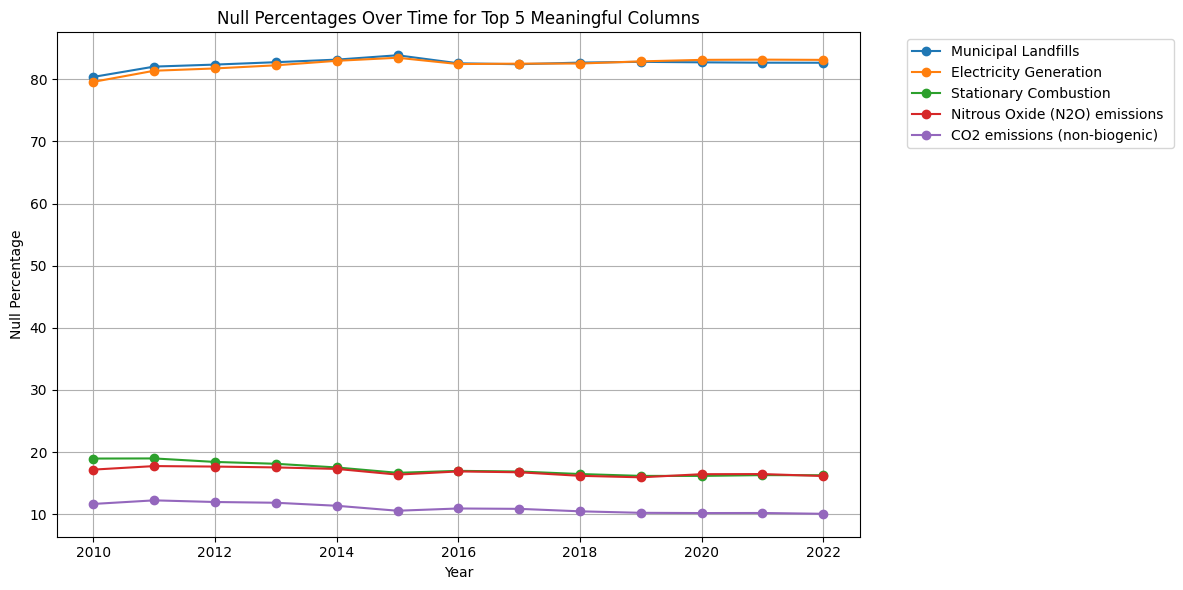


Columns with Complete Data (no nulls):
- Zip Code
- State
- Facility Name
- City
- Year
- Latitude
- Longitude
- Industry Type (subparts)
- Does the facility employ continuous emissions monitoring? 
- Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?
- Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S)
- Industry Type (sectors)
- Total reported direct emissions
- Facility Id


In [18]:
# Create a DataFrame with null counts and percentages
null_analysis = pd.DataFrame({
    'Null Count': merged_df.isnull().sum(),
    'Null Percentage': (merged_df.isnull().sum() / len(merged_df) * 100).round(2)
})

# Sort by null count in descending order
null_analysis = null_analysis.sort_values('Null Count', ascending=False)

# Add % symbol to percentage column
null_analysis['Null Percentage'] = null_analysis['Null Percentage'].apply(lambda x: f"{x}%")

# Print overall null analysis
print("\nNull Analysis (sorted by most nulls to least):")
print(null_analysis)

# Get columns with less than 90% nulls (more meaningful for analysis)
meaningful_columns = null_analysis[
    null_analysis['Null Count'] / len(merged_df) < 0.9
].index.tolist()[:5]

print("\nDetailed Analysis for Top 5 Columns with Meaningful Data (less than 90% nulls):")
for column in meaningful_columns:
    print(f"\n{column}")
    print("-" * 50)

    # Calculate nulls by year
    yearly_stats = merged_df.groupby('Year').agg({
        column: lambda x: x.isna().sum()
    }).rename(columns={column: 'Null Count'})

    # Calculate total records per year
    yearly_total = merged_df.groupby('Year').size()

    # Calculate percentages
    yearly_stats['Total Records'] = yearly_total
    yearly_stats['Null Percentage'] = (yearly_stats['Null Count'] / yearly_stats['Total Records'] * 100).round(2)

    print(yearly_stats)

# Visualize null percentages over time for meaningful columns
plt.figure(figsize=(12, 6))
for column in meaningful_columns:
    yearly_nulls = merged_df.groupby('Year').agg({
        column: lambda x: x.isna().sum()
    })
    yearly_total = merged_df.groupby('Year').size()
    yearly_percentages = (yearly_nulls[column] / yearly_total * 100)

    plt.plot(yearly_percentages.index, yearly_percentages.values, marker='o', label=column)

plt.title('Null Percentages Over Time for Top 5 Meaningful Columns')
plt.xlabel('Year')
plt.ylabel('Null Percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print summary of columns with complete data
complete_columns = null_analysis[null_analysis['Null Count'] == 0].index.tolist()
print("\nColumns with Complete Data (no nulls):")
for col in complete_columns:
    print(f"- {col}")

In [19]:
# Get columns to drop (>70% nulls)
columns_to_drop = null_analysis[
    null_analysis['Null Count'] / len(merged_df) > 0.7
].index.tolist()

# Drop the columns
merged_df_cleaned = merged_df.drop(columns=columns_to_drop)

print("\nColumns dropped:", columns_to_drop)
print("\nAfter dropping columns - Shape:", merged_df_cleaned.shape)

# Show updated null analysis
null_analysis_after = pd.DataFrame({
    'Null Count': merged_df_cleaned.isnull().sum(),
    'Null Percentage': (merged_df_cleaned.isnull().sum() / len(merged_df_cleaned) * 100).round(2)
})
null_analysis_after = null_analysis_after.sort_values('Null Count', ascending=False)
null_analysis_after['Null Percentage'] = null_analysis_after['Null Percentage'].apply(lambda x: f"{x}%")

print("\nUpdated Null Analysis:")
print(null_analysis_after)

# Print summary of remaining columns
print("\nRemaining columns with highest null percentages (top 10):")
print(null_analysis_after.head(10))

print("\nNumber of columns:")
print(f"Original: {len(merged_df.columns)}")
print(f"After dropping: {len(merged_df_cleaned.columns)}")
print(f"Columns removed: {len(columns_to_drop)}")

# Optional: Save cleaned dataset
# merged_df_cleaned.to_csv('cleaned_emissions_2010_2023.csv', index=False)


Columns dropped: ['Silicon Carbide Production', 'Adipic Acid Production', 'Soda Ash Manufacturing', 'HCFC–22 Production from HFC–23 Destruction', 'Petroleum and Natural Gas Systems – LNG Storage', 'Manufacture of Electric Transmission and Distribution Equipment', 'Zinc Production', 'Titanium Dioxide Production', 'Other GHGs (metric tons CO2e)', 'Petroleum and Natural Gas Systems – LNG Import/Export', 'Aluminum Production', 'Magnesium Production', 'Ferroalloy Production', 'Miscellaneous Use of Carbonates', 'Phosphoric Acid Production', 'Lead Production', 'Fluorinated GHG Production', 'HFE emissions', 'Very Short-lived Compounds emissions', 'Ammonia Manufacturing', 'Nitric Acid Production', 'Petroleum and Natural Gas Systems – Underground Storage', 'NF3 emissions', 'Other Fully Fluorinated GHG emissions', 'Electronics Manufacture', 'SF6 emissions ', 'HFC emissions', 'PFC emissions', 'Petrochemical Production', 'Lime Production', 'Underground Coal Mines', 'Cement Production', 'Glass Prod

# EDA

In [20]:
# Print all column names
print("Available columns in cleaned DataFrame:")
for col in merged_df_cleaned.columns:
    print(f"'{col}'")

# Check for trailing/leading spaces
print("\nColumn names with whitespace visible:")
for col in merged_df_cleaned.columns:
    print(f"Length: {len(col)}, Name: '{col}'")

# Create state mapping
state_mapping = {state: i+1 for i, state in enumerate(sorted(merged_df_cleaned['State'].unique()))}

# Create copy of cleaned dataframe
df_encoded = merged_df_cleaned.copy()

# Encode states
df_encoded['State'] = df_encoded['State'].map(state_mapping)

# Print state mapping
print("\nState Mapping:")
for state, number in sorted(state_mapping.items(), key=lambda x: x[1]):
    print(f"{state}: {number}")

# Find Y/N columns in the cleaned dataset
yn_columns = []
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':  # Check if column is string type
        unique_vals = df_encoded[col].unique()
        if set(unique_vals) - {None, np.nan} == {'Y', 'N'}:  # Check if only Y/N values
            yn_columns.append(col)

print("\nY/N Columns found:")
for col in yn_columns:
    print(f"'{col}'")

# Encode Y/N columns
for col in yn_columns:
    df_encoded[col] = df_encoded[col].map({'Y': 1, 'N': 0})

# Print sample of encoded data
print("\nSample of encoded data:")
sample_cols = ['State'] + yn_columns[:2]  # State and first two Y/N columns
print(df_encoded[sample_cols].head())

# Print summary of encoding
print("\nEncoding Summary:")
print(f"Total columns: {len(df_encoded.columns)}")
print(f"States encoded: {len(state_mapping)}")
print(f"Y/N columns encoded: {len(yn_columns)}")

# Optional: verify encoding
print("\nVerification of encoding:")
print("State values:", sorted(df_encoded['State'].unique()))
if yn_columns:
    print("Y/N column values:", sorted(df_encoded[yn_columns[0]].unique()))

Available columns in cleaned DataFrame:
'Facility Id'
'FRS Id'
'Facility Name'
'City'
'State'
'Zip Code'
'Address'
'County'
'Latitude'
'Longitude'
'Primary NAICS Code'
'Industry Type (subparts)'
'Industry Type (sectors)'
'Total reported direct emissions'
'CO2 emissions (non-biogenic) '
'Methane (CH4) emissions '
'Nitrous Oxide (N2O) emissions '
'Stationary Combustion'
'Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S)'
'Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?'
'Does the facility employ continuous emissions monitoring? '
'Year'

Column names with whitespace visible:
Length: 11, Name: 'Facility Id'
Length: 6, Name: 'FRS Id'
Length: 13, Name: 'Facility Name'
Length: 4, Name: 'City'
Length: 5, Name: 'State'
Length: 8, N

Sample of encoded data:
   State  Year  \
0     46  2010   
1     36  2010   
2     34  2010   
3     34  2010   
4     34  2010   

   Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S)  \
0                                                  0                                                                                                                                    
1                                                  0                                                                                                                                    
2                                                  0                                                                                                                                    
3                                                  0                                                                           

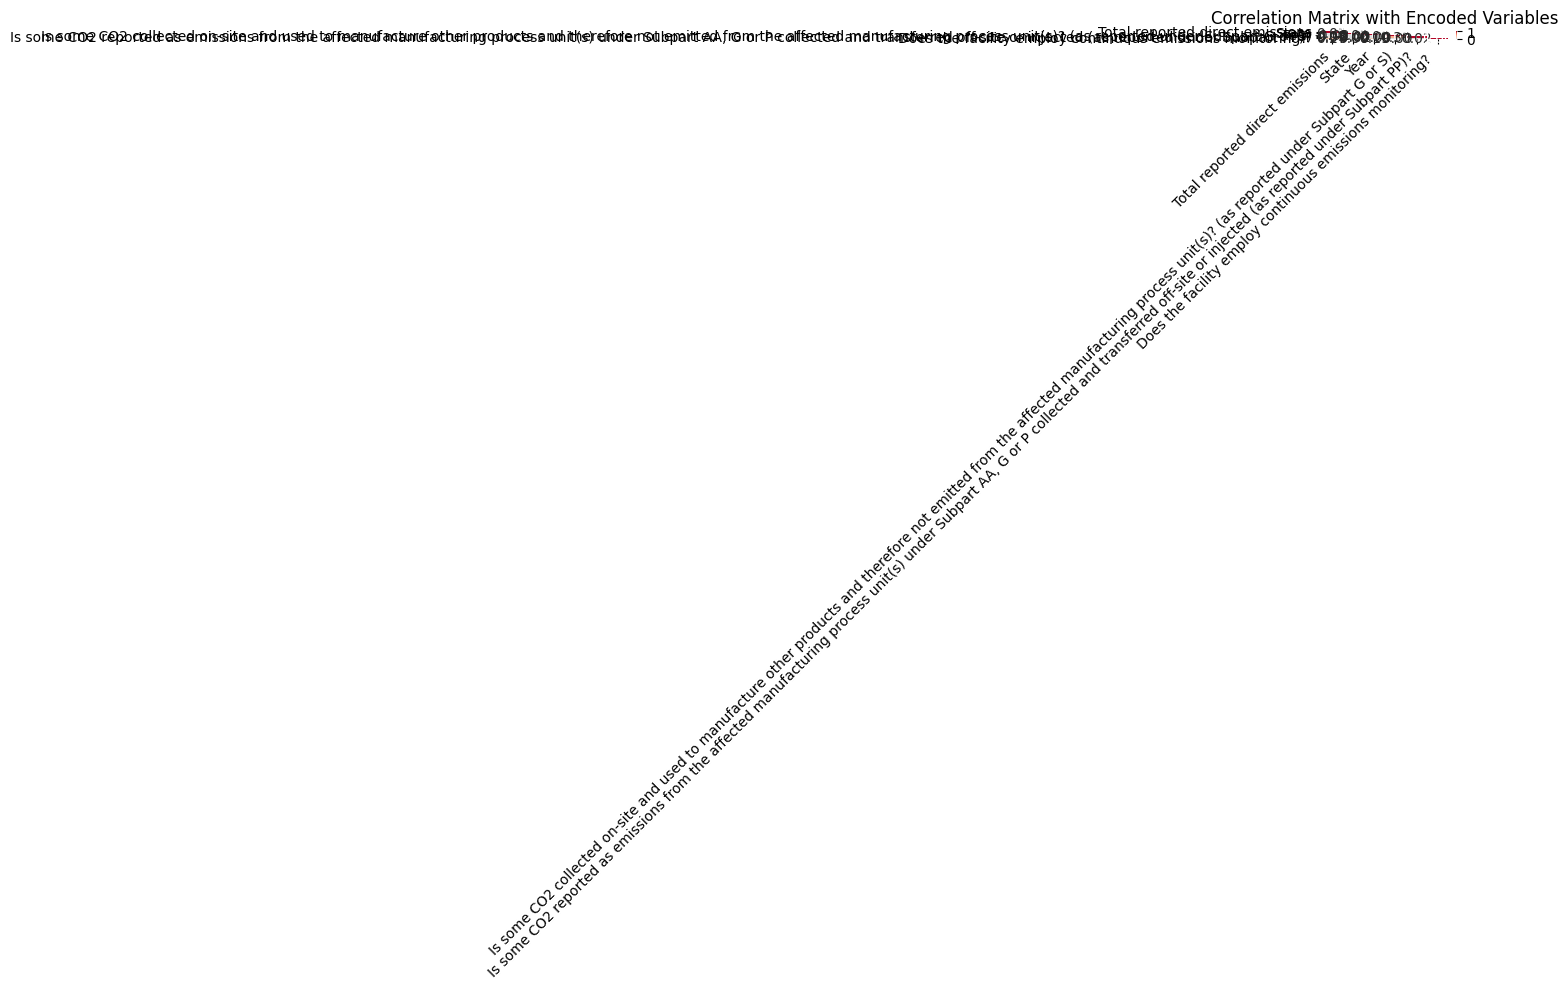


Average emissions by year:
Year
2010    507634.056745
2011    464395.974229
2012    430593.606392
2013    427369.475215
2014    419658.292722
2015    405888.371075
2016    426680.552974
2017    421504.729301
2018    422249.545243
2019    399399.303833
2020    366485.108930
2021    386508.389461
2022    384445.642306
Name: Total reported direct emissions, dtype: float64


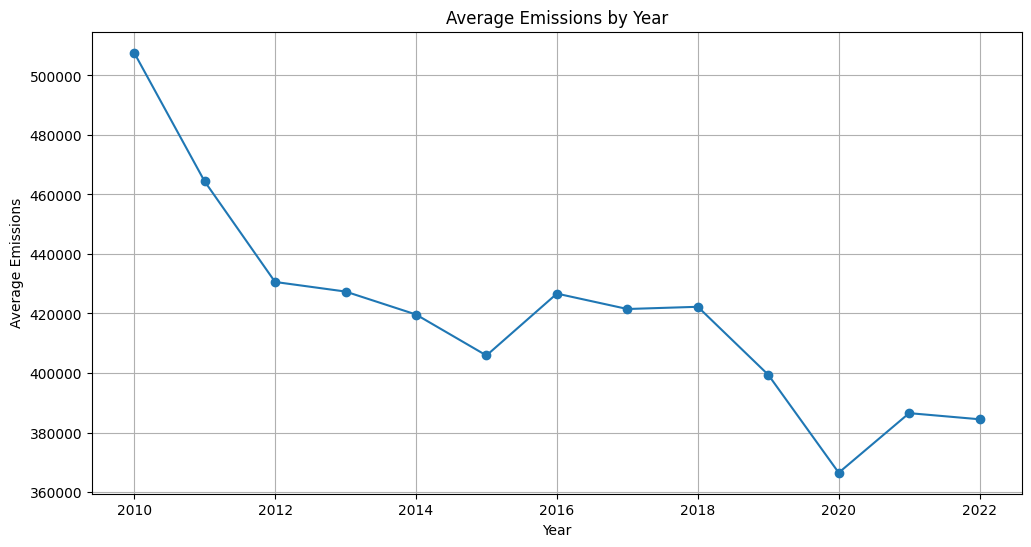


Top 5 states by average emissions:
MO: 729,729.63
IN: 726,133.44
FL: 723,368.83
WV: 721,470.84
ND: 678,365.33


In [21]:
# Create state mapping
state_mapping = {state: i+1 for i, state in enumerate(sorted(merged_df_cleaned['State'].unique()))}

# Create copy of cleaned dataframe
df_encoded = merged_df_cleaned.copy()

# Encode states
df_encoded['State'] = df_encoded['State'].map(state_mapping)

# Define Y/N columns with exact names
yn_columns = [
    'Is some CO2 collected on-site and used to manufacture other products and therefore not emitted from the affected manufacturing process unit(s)? (as reported under Subpart G or S)',
    'Is some CO2 reported as emissions from the affected manufacturing process unit(s) under Subpart AA, G or P collected and transferred off-site or injected (as reported under Subpart PP)?',
    'Does the facility employ continuous emissions monitoring? '
]

# Convert Y/N to 1/0
for col in yn_columns:
    df_encoded[col] = df_encoded[col].map({'Y': 1, 'N': 0})

# Print sample of encoded data
print("Sample of encoded data:")
print(df_encoded[['State', 'Year'] + yn_columns].head())

# Print state mapping
print("\nState Mapping:")
for state, number in sorted(state_mapping.items(), key=lambda x: x[1]):
    print(f"{state}: {number}")

# Calculate correlations with target variable
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns
target = 'Total reported direct emissions'

# Calculate correlations and sort
correlations = df_encoded[numeric_cols].corr()[target].sort_values(ascending=False)
print("\nCorrelations with Total reported direct emissions:")
print(correlations)

# Create correlation heatmap
plt.figure(figsize=(15, 10))
selected_cols = ['Total reported direct emissions', 'State', 'Year'] + yn_columns
correlation_matrix = df_encoded[selected_cols].corr()

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            mask=np.triu(np.ones_like(correlation_matrix), k=1))
plt.title('Correlation Matrix with Encoded Variables')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Additional analysis: Trends over time
print("\nAverage emissions by year:")
yearly_avg = df_encoded.groupby('Year')[target].mean()
print(yearly_avg)

# Plot emissions trend
plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='line', marker='o')
plt.title('Average Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Average Emissions')
plt.grid(True)
plt.show()

# State analysis
print("\nTop 5 states by average emissions:")
state_avg = df_encoded.groupby('State')[target].mean().sort_values(ascending=False)
state_names = {v: k for k, v in state_mapping.items()}
top_states = state_avg.head()
for state_code, avg_emissions in top_states.items():
    print(f"{state_names[state_code]}: {avg_emissions:,.2f}")

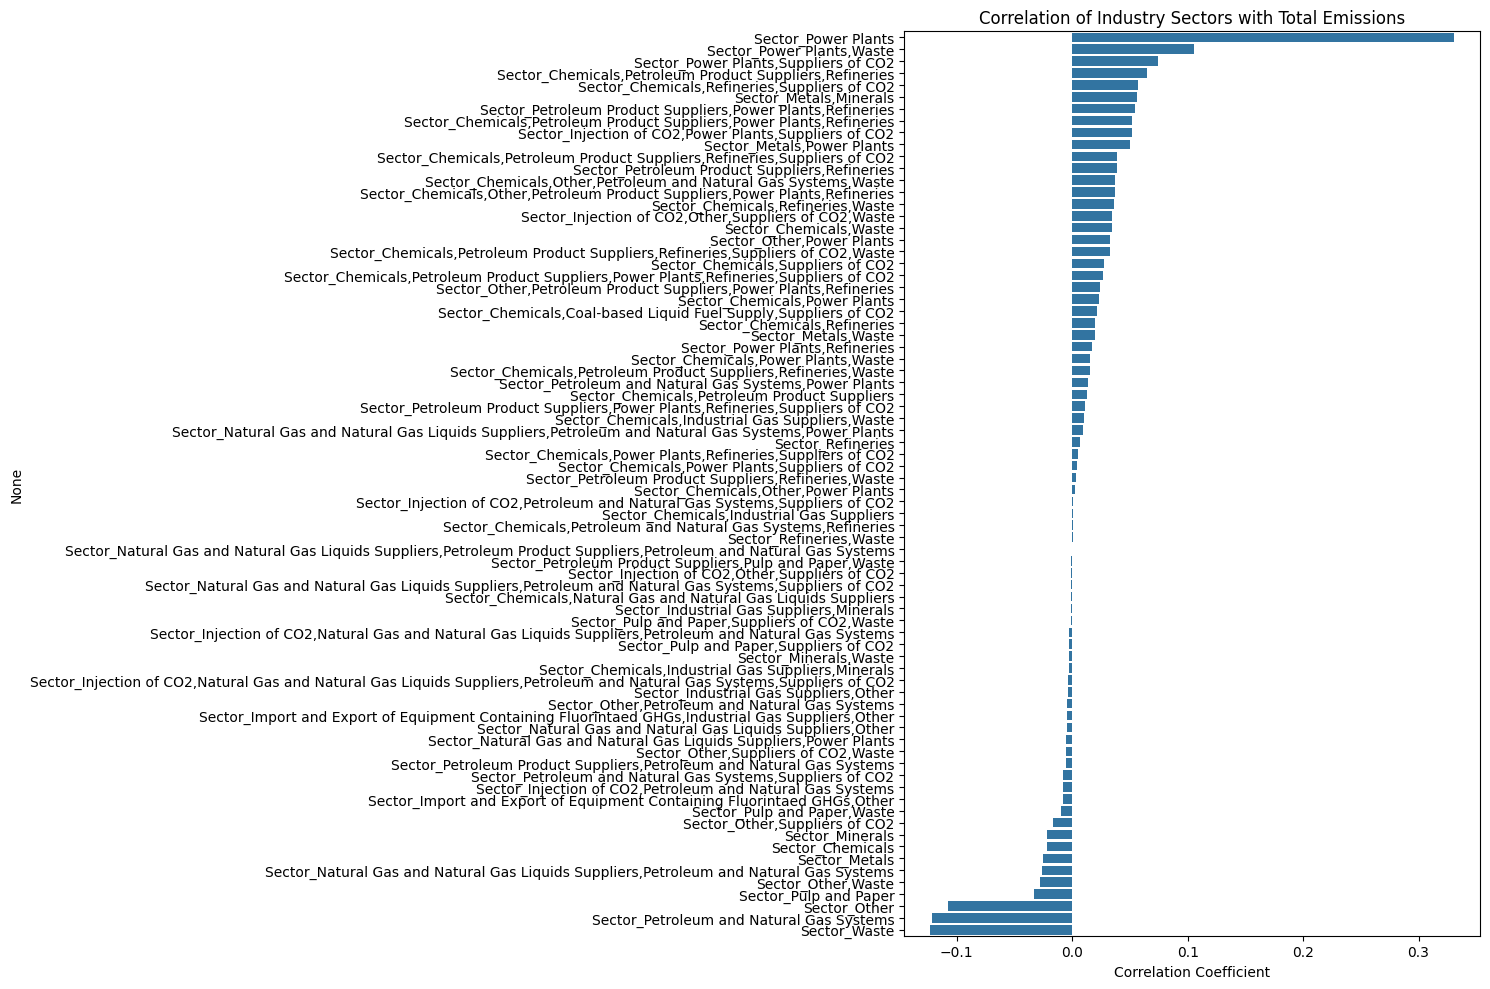


Correlations with Total Emissions by Sector:
Sector_Power Plants: 0.331
Sector_Power Plants,Waste: 0.105
Sector_Power Plants,Suppliers of CO2: 0.074
Sector_Chemicals,Petroleum Product Suppliers,Refineries: 0.064
Sector_Chemicals,Refineries,Suppliers of CO2: 0.057
Sector_Metals,Minerals: 0.056
Sector_Petroleum Product Suppliers,Power Plants,Refineries: 0.055
Sector_Chemicals,Petroleum Product Suppliers,Power Plants,Refineries: 0.052
Sector_Injection of CO2,Power Plants,Suppliers of CO2: 0.051
Sector_Metals,Power Plants: 0.050
Sector_Chemicals,Petroleum Product Suppliers,Refineries,Suppliers of CO2: 0.039
Sector_Petroleum Product Suppliers,Refineries: 0.039
Sector_Chemicals,Other,Petroleum and Natural Gas Systems,Waste: 0.037
Sector_Chemicals,Other,Petroleum Product Suppliers,Power Plants,Refineries: 0.037
Sector_Chemicals,Refineries,Waste: 0.036
Sector_Injection of CO2,Other,Suppliers of CO2,Waste: 0.034
Sector_Chemicals,Waste: 0.034
Sector_Other,Power Plants: 0.033
Sector_Chemicals,Pe

<ipython-input-22-9b1cb28c307c>:36: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1500x800 with 0 Axes>

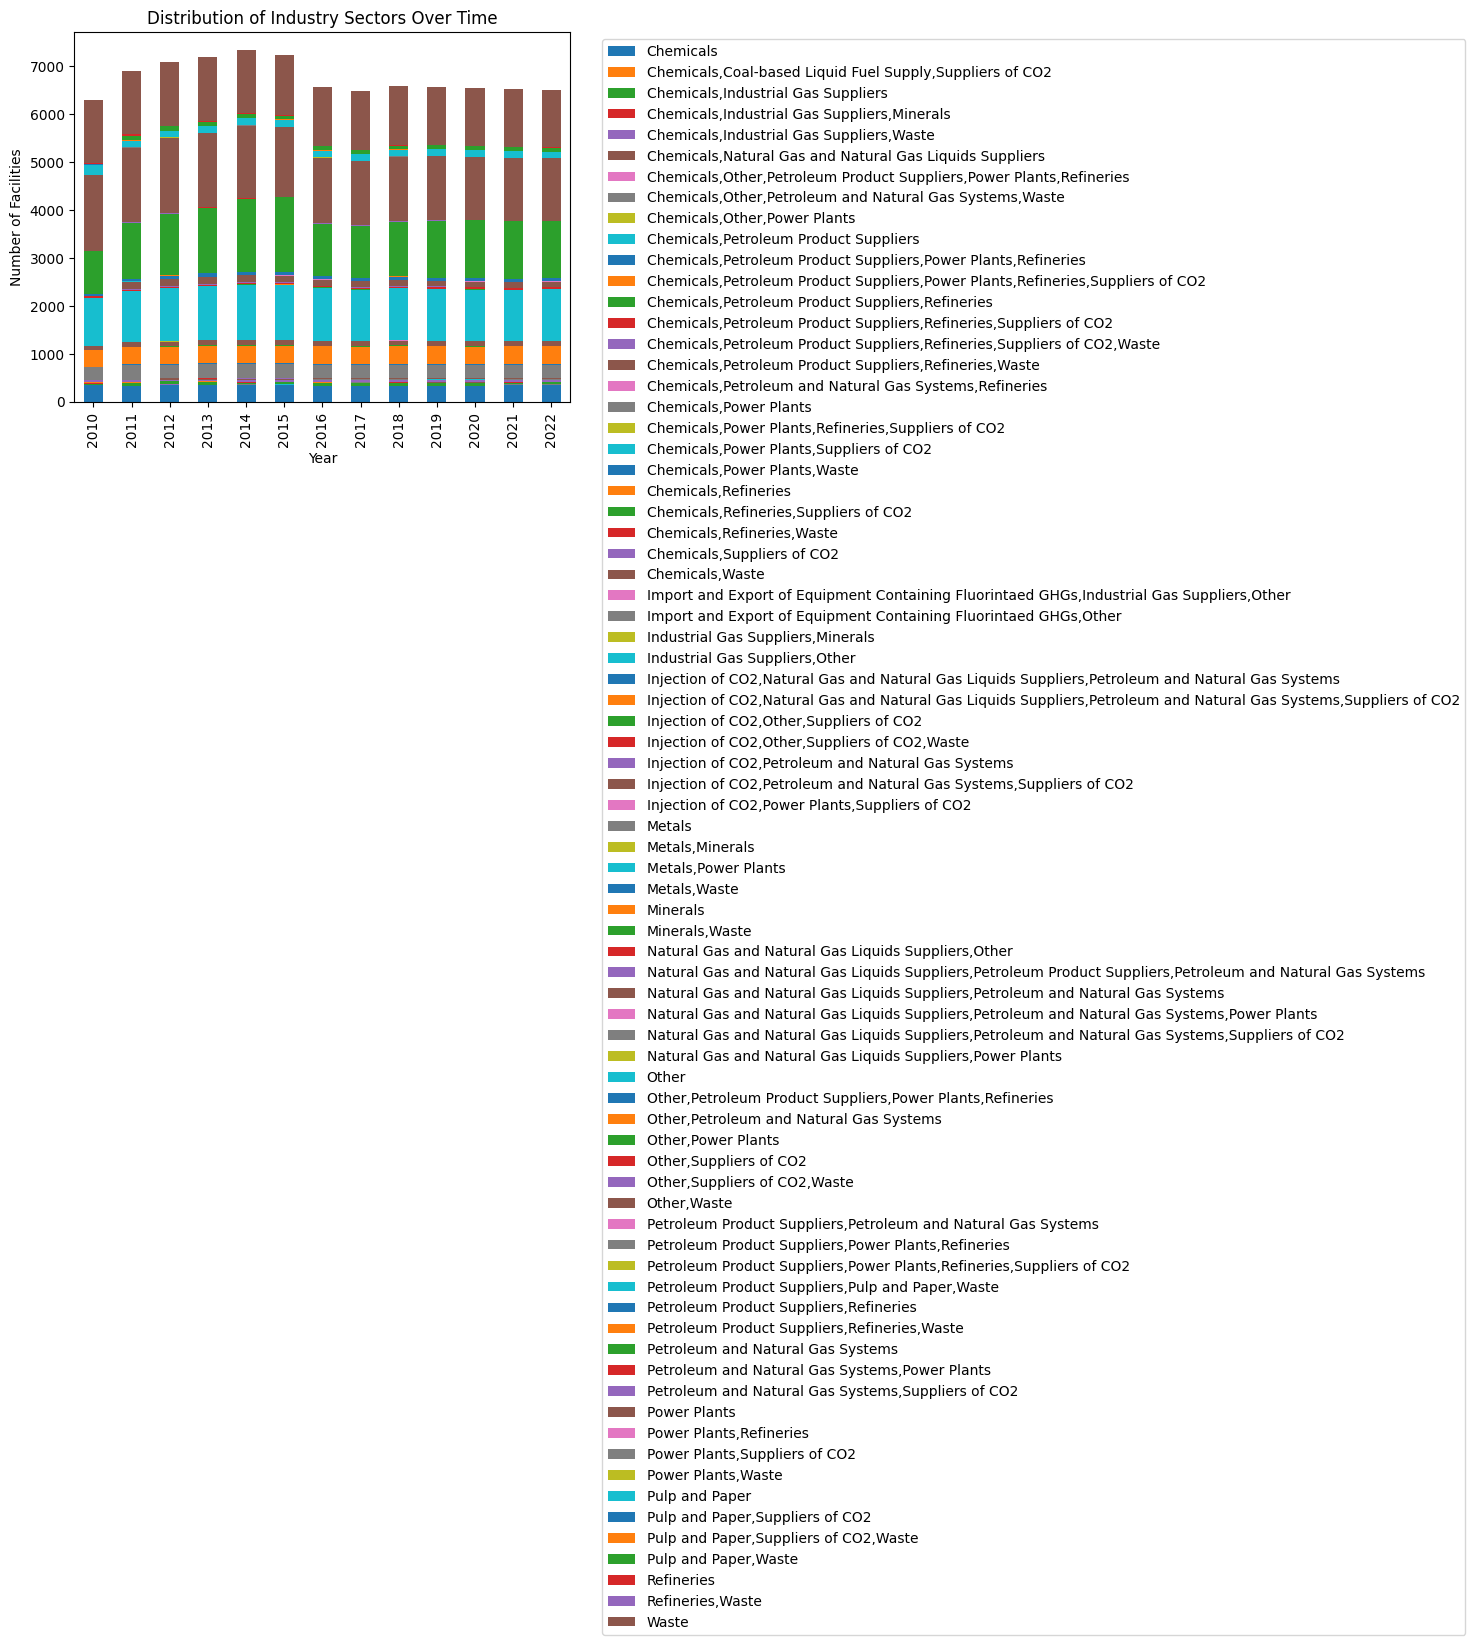

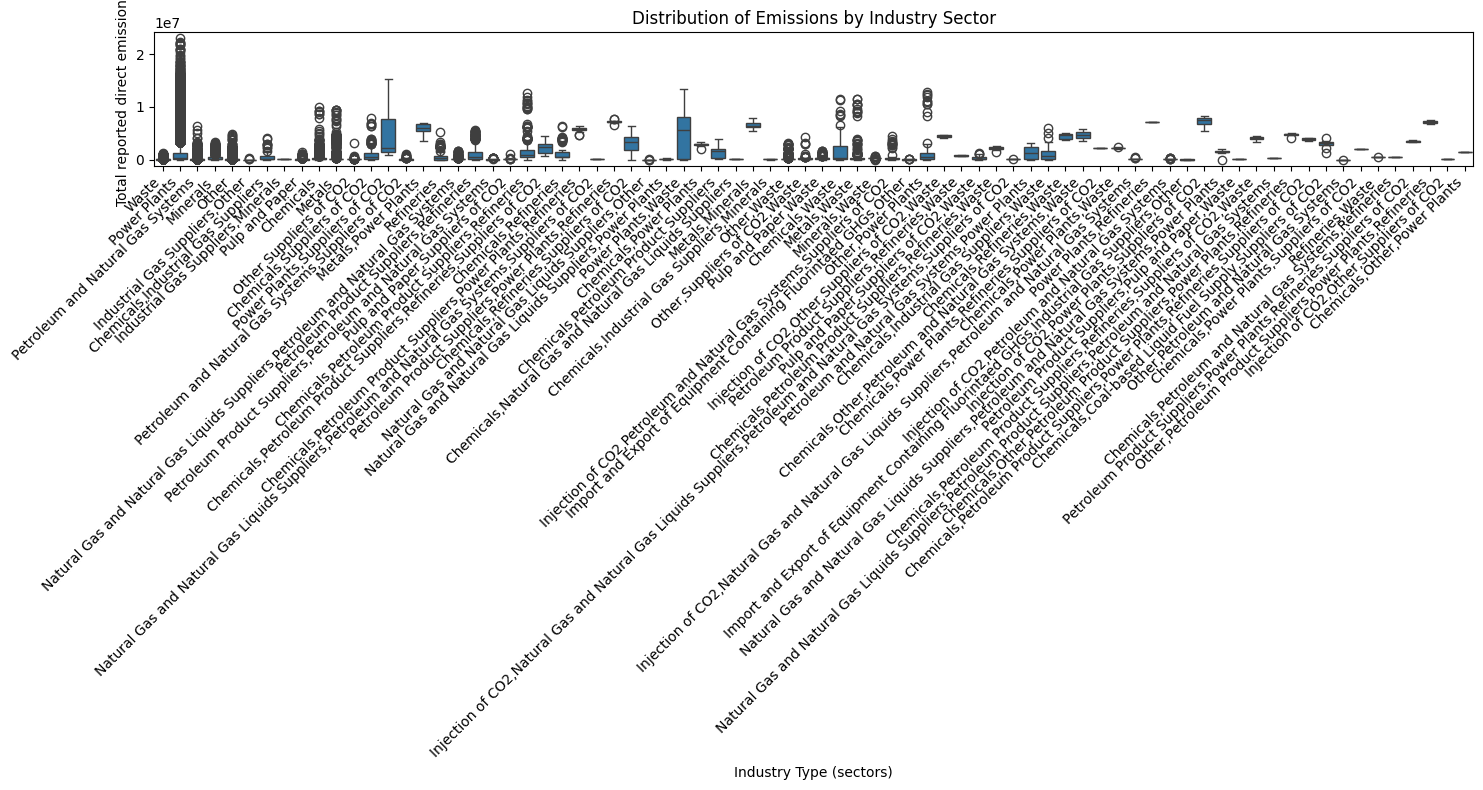


Sector Statistics:
                                                   Total reported direct emissions  \
                                                                             count   
Industry Type (sectors)                                                              
Chemicals                                                                     4385   
Chemicals,Coal-based Liquid Fuel Supply,Supplie...                              11   
Chemicals,Industrial Gas Suppliers                                             182   
Chemicals,Industrial Gas Suppliers,Minerals                                     12   
Chemicals,Industrial Gas Suppliers,Waste                                        16   
...                                                                            ...   
Pulp and Paper,Suppliers of CO2,Waste                                           70   
Pulp and Paper,Waste                                                          1011   
Refineries                        

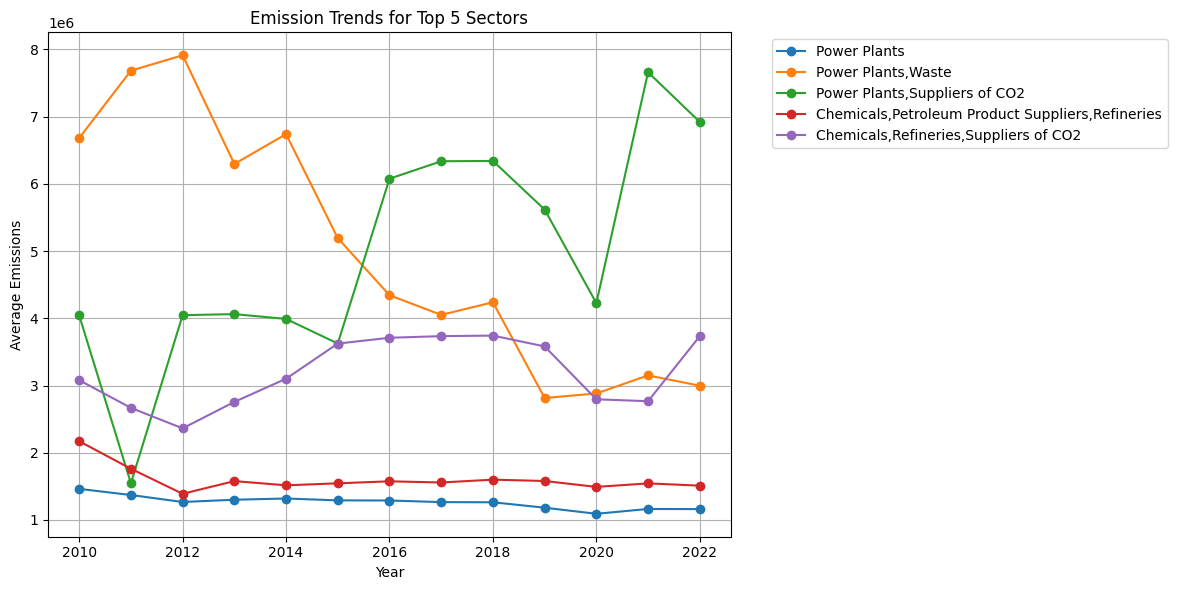

In [22]:
# Create dummy variables for Industry Type (sectors)
sector_dummies = pd.get_dummies(df_encoded['Industry Type (sectors)'], prefix='Sector')

# Add dummy columns to dataframe
df_with_sectors = pd.concat([df_encoded, sector_dummies], axis=1)

# Calculate correlations with emissions for each sector
sector_correlations = df_with_sectors[sector_dummies.columns].corrwith(df_with_sectors['Total reported direct emissions'])
sector_correlations = sector_correlations.sort_values(ascending=False)

# Plot sector correlations
plt.figure(figsize=(15, 10))
sns.barplot(x=sector_correlations.values, y=sector_correlations.index)
plt.title('Correlation of Industry Sectors with Total Emissions')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Print correlations
print("\nCorrelations with Total Emissions by Sector:")
for sector, corr in sector_correlations.items():
    print(f"{sector}: {corr:.3f}")

# Analyze sector distribution over time
sector_year_counts = df_encoded.groupby(['Year', 'Industry Type (sectors)']).size().unstack(fill_value=0)
print("\nNumber of facilities per sector over time:")
print(sector_year_counts)

# Plot sector distribution over time
plt.figure(figsize=(15, 8))
sector_year_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of Industry Sectors Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Facilities')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create boxplot for emissions by sector
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_encoded,
            x='Industry Type (sectors)',
            y='Total reported direct emissions')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Emissions by Industry Sector')
plt.tight_layout()
plt.show()

# Calculate and print summary statistics by sector
sector_stats = df_encoded.groupby('Industry Type (sectors)').agg({
    'Total reported direct emissions': ['count', 'mean', 'std', 'min', 'max'],
    'Year': ['min', 'max']
}).round(2)

print("\nSector Statistics:")
print(sector_stats)

# Analyze top emitting sectors by year
top_sectors_by_year = df_encoded.groupby(['Year', 'Industry Type (sectors)'])['Total reported direct emissions'].mean().unstack()
print("\nAverage emissions by sector and year:")
print(top_sectors_by_year)

# Plot trends for top 5 sectors
top_5_sectors = sector_correlations.head().index
plt.figure(figsize=(12, 6))
for sector in top_5_sectors:
    sector_name = sector.replace('Sector_', '')
    yearly_avg = df_with_sectors[df_encoded['Industry Type (sectors)'] == sector_name].groupby('Year')['Total reported direct emissions'].mean()
    plt.plot(yearly_avg.index, yearly_avg.values, marker='o', label=sector_name)

plt.title('Emission Trends for Top 5 Sectors')
plt.xlabel('Year')
plt.ylabel('Average Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()